# FEDS debugging system

## Fire_Forward in FireMain.py 

In [6]:
import ycpy
ycpy.util.nowarn()

In [7]:
import FireObj
import FireIO
import FireConsts
import FireMain

In [8]:
import importlib
importlib.reload(FireIO)
importlib.reload(FireMain)
importlib.reload(FireObj)
importlib.reload(FireConsts)

<module 'FireConsts' from '/Users/yangchen/GoogleDrive/My/My.Research/UCI/ProjectsFull/California.fire/Code/fireatlas/FireConsts.py'>

In [9]:
import os
import glob

In [10]:
import pandas as pd
import geopandas as gpd

### Functioning at each time step

Set time and region

In [1]:
# set time
# t = (2021,8,1,'AM')
t = (2021,8,6,'PM')

from datetime import date
d = date(*t[:-1])

In [9]:
# set region
# region = ['Brazil',[-55,-25,-45,-15]]

# shp_CA = FireIO.get_Cal_shp()
# region = ['CA',shp_CA]
# regbox = region[1].bounds

region = ('Dixie',[-121.6,39.8,-120.5,40.6])
regbox = region[1]

shp_Reg = FireIO.get_reg_shp(region[1])

Fobj_init

In [10]:
allfires = FireMain.Fobj_init(t,restart=True)

In [11]:
# 2. update allfires and fire object changes due to temporal progression
fids_ea = allfires.fids_active
# all fires
allfires.update_t(t)           # update t for allfires
allfires.reset_fids_updated()  # reset fids_expanded, fids_new, fids_merged, fids_invalid
# for each fire
allfires.update_t_allfires(t)  # update t
allfires.reset_newpixels()     # reset newpixels

Read_AFP

In [12]:
# read 
afp_SNPP = FireIO.read_AFP(t,src='SNPP',nrt=False,region=region)
afp_SNPPNRT = FireIO.read_AFP(t,src='SNPP',nrt=True,region=region)
afp_NOAA20 = FireIO.read_AFP(t,src='NOAA20',nrt=False,region=region)

In [13]:
# convert to gdf (for plotting)
gdf_SNPP = gpd.GeoDataFrame(afp_SNPP, geometry=gpd.points_from_xy(afp_SNPP.Lon, afp_SNPP.Lat))
gdf_SNPPNRT = gpd.GeoDataFrame(afp_SNPPNRT, geometry=gpd.points_from_xy(afp_SNPPNRT.Lon, afp_SNPPNRT.Lat))
gdf_NOAA20 = gpd.GeoDataFrame(afp_NOAA20, geometry=gpd.points_from_xy(afp_NOAA20.Lon, afp_NOAA20.Lat))

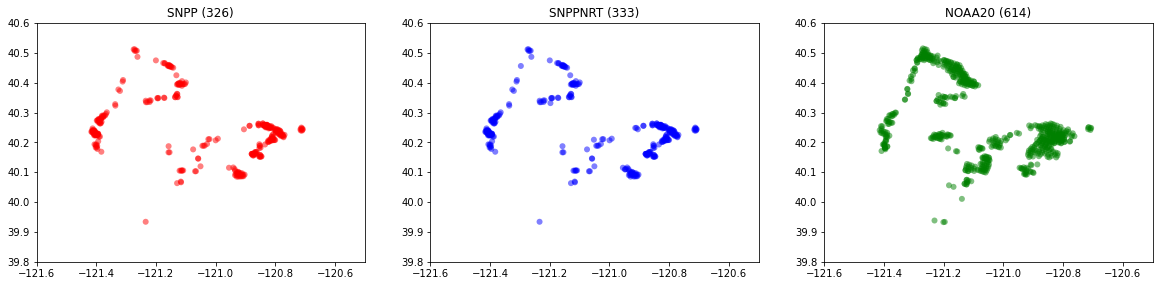

In [14]:
# plot
fig,ax=plt.subplots(ncols=3,figsize=(20,6))
gdf_SNPP.plot(ax=ax[0],facecolor='r',edgecolor='none',alpha=0.5)
ax[0].set(xlim=(regbox[0],regbox[2]),ylim=(regbox[1],regbox[3]),title='SNPP ('+str(len(afp_SNPP))+')')
gdf_SNPPNRT.plot(ax=ax[1],facecolor='b',edgecolor='none',alpha=0.5)
ax[1].set(xlim=(regbox[0],regbox[2]),ylim=(regbox[1],regbox[3]),title='SNPPNRT ('+str(len(afp_SNPPNRT))+')')
gdf_NOAA20.plot(ax=ax[2],facecolor='g',edgecolor='none',alpha=0.5)
_=ax[2].set(xlim=(regbox[0],regbox[2]),ylim=(regbox[1],regbox[3]),title='NOAA20 ('+str(len(afp_NOAA20))+')')

Fire exansion/creation

In [15]:
# Use SNPP data for example
afp = afp_SNPP


allfires = FireMain.Fire_expand_rtree(allfires,afp,fids_ea)

print(allfires.number_of_fires)

42


In [16]:
# may test details within Fire_expand_rtree
# afp_loc = list(zip(afp.Lat, afp.Lon))

Fire merging

In [17]:
fids_ne = allfires.fids_ne                         # new or expanded fires id
fids_ea = sorted(set(fids_ea+allfires.fids_new))   # existing active fires (new fires included)
fids_sleep = allfires.fids_sleeper

In [18]:
allfires = FireMain.Fire_merge_rtree(allfires,fids_ne,fids_ea,fids_sleep)

Fire type update

In [19]:
from FireConsts import dirpjdata,FTYP_opt,FTYP_preset
allfires.updateftypes(opt=FTYP_opt,presetftype=FTYP_preset)

Single fire test

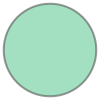

In [20]:
allfires.fires[16].hull

### Time forward test

In [21]:
t = FireObj.t_nb(t,nb='next')

In [22]:
# 1. record existing active fire ids (for the previous time step)
fids_ea = allfires.fids_active

# 2. update allfires and fire object changes due to temporal progression
# all fires
allfires.update_t(t)           # update t for allfires
allfires.reset_fids_updated()  # reset fids_expanded, fids_new, fids_merged, fids_invalid
# for each fire
allfires.update_t_allfires(t)  # update t
allfires.reset_newpixels()     # reset newpixels

In [23]:
afp = FireIO.read_AFP(t,src='SNPP',nrt=False,region=region)

In [24]:
allfires = FireMain.Fire_expand_rtree(allfires,afp,fids_ea)
print(allfires.number_of_fires)

60


In [25]:
fids_ne = allfires.fids_ne                         # new or expanded fires id
fids_ea = sorted(set(fids_ea+allfires.fids_new))   # existing active fires (new fires included)
fids_sleep = allfires.fids_sleeper
allfires = FireMain.Fire_merge_rtree(allfires,fids_ne,fids_ea,fids_sleep)

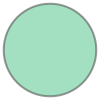

In [26]:
allfires.fires[16].hull

## Single fire simulation
Run FireMain.py by setting:

```
tst=(2021,7,13,'AM')
ted=(2021,9,15,'PM')
region = ('Dixie',[-121.6,39.8,-120.5,40.6])
Fire_Forward(tst=tst,ted=ted,restart=True,region=region,src='SNPP')
```

In [1]:
import FireObj
import importlib
importlib.reload(FireObj)

<module 'FireObj' from '/Users/yangchen/GoogleDrive/My/My.Research/UCI/ProjectsFull/California.fire/Code/fireatlas/FireObj.py'>

In [2]:
t = (2021,8,6,'PM')

In [9]:
allfires = FireIO.load_fobj(t)

In [10]:
# for f in allfires.fires:
#     print(f.fireID, f.farea)

In [11]:
f = allfires.fires[0]

In [12]:
from shapely.geometry import Point
import geopandas as gpd
mp = [Point(p.lon,p.lat) for p in f.flinepixels]
gdf_flp = gpd.GeoSeries(mp)

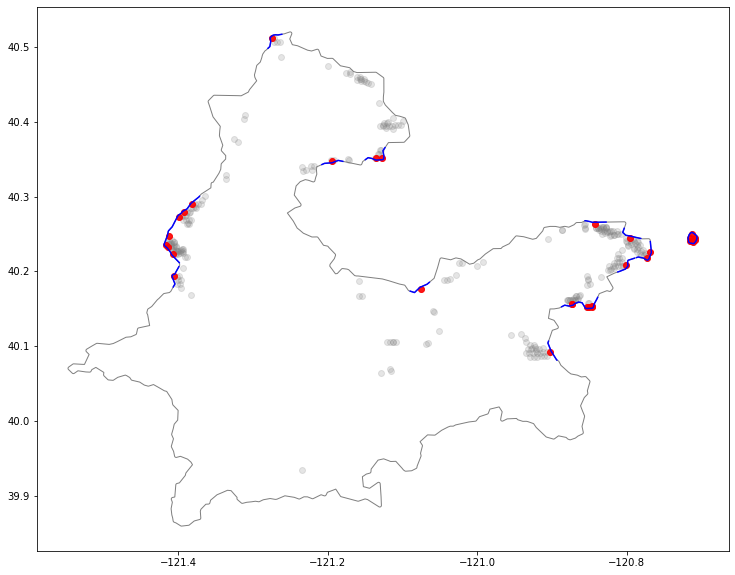

In [104]:
fig,ax=plt.subplots(ncols=1,figsize=(15,10))
gpd.GeoSeries(f.hull).plot(ax=ax,facecolor='none',edgecolor='grey')
_=gpd.GeoSeries(f.newlocsMP).plot(ax=ax,color='grey',alpha=0.2)
_=gpd.GeoSeries(f.fline).plot(ax=ax,facecolor='none',edgecolor='blue')
_=gdf_flp.plot(ax=ax,color='r',alpha=0.9)

Sensitifity of fire line to the value of parameter fpbuffer

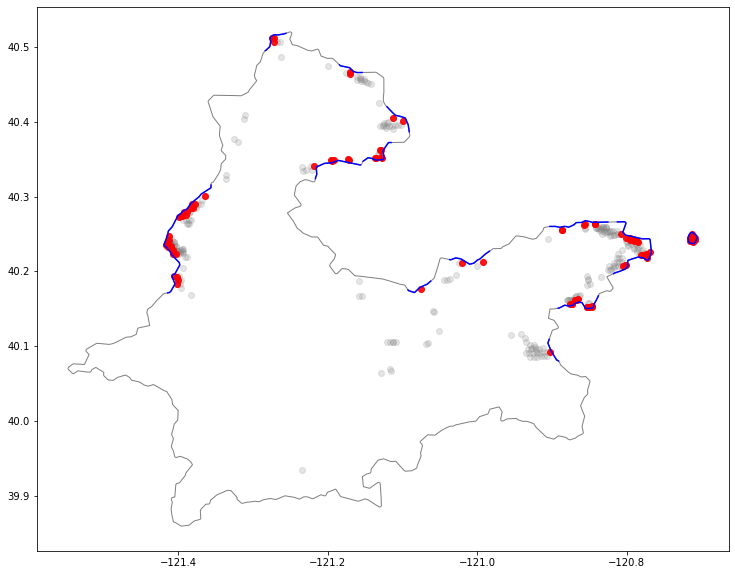

In [14]:
# fpbuffer changed from 200m to 500m
fig,ax=plt.subplots(ncols=1,figsize=(15,10))
gpd.GeoSeries(f.hull).plot(ax=ax,facecolor='none',edgecolor='grey')
_=gpd.GeoSeries(f.newlocsMP).plot(ax=ax,color='grey',alpha=0.2)
_=gpd.GeoSeries(f.fline).plot(ax=ax,facecolor='none',edgecolor='blue')
_=gdf_flp.plot(ax=ax,color='r',alpha=0.9)

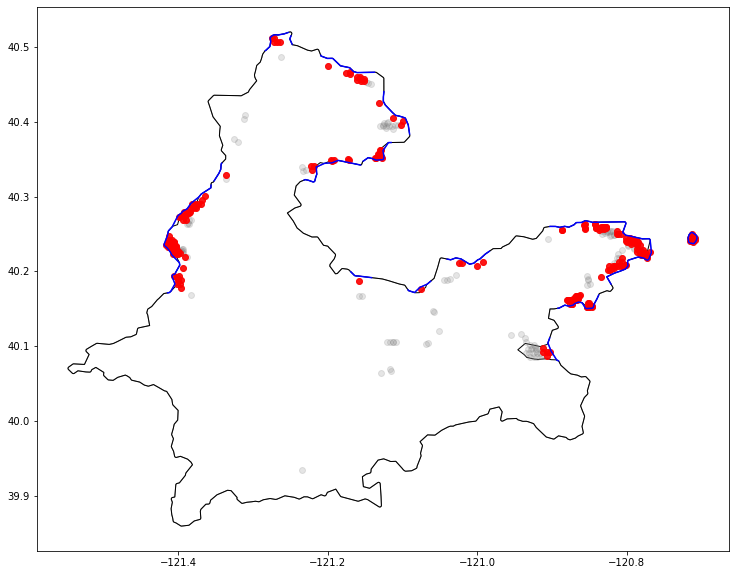

In [18]:
# fpbuffer changed from 200m to 1000m
fig,ax=plt.subplots(ncols=1,figsize=(15,10))
gpd.GeoSeries(f.hull).plot(ax=ax,facecolor='none',edgecolor='grey')

f_pt = FireIO.load_fobj(FireObj.t_nb(t,nb='previous')).fires[0]
gpd.GeoSeries(f_pt.hull).plot(ax=ax,facecolor='none',edgecolor='black')

_=gpd.GeoSeries(f.newlocsMP).plot(ax=ax,color='grey',alpha=0.2)
_=gpd.GeoSeries(f.fline).plot(ax=ax,facecolor='none',edgecolor='blue')
_=gdf_flp.plot(ax=ax,color='r',alpha=0.9)

## Snapshot

In [7]:
# set time
# t = (2021,8,1,'AM')
t = (2021,8,6,'PM')

from datetime import date
d = date(*t[:-1])

In [18]:
allfires = FireIO.load_fobj(t)

In [10]:
heritage = dict(FireIO.load_fobj(t).heritages)

In [12]:
dd = {'fireID':'int',                  # id
      'mergid':'int',               # this is the id in the large fire database
      #'clat':'float',               # centroid latitude   -> centroid[0]
      #'clon':'float',               # centroid longitude  -> centroid[1]
      'ftype':'int',                # fire type
      'isactive':'int',             # active status
      't_inactive':'int',           # how long has it been inactive
      'isignition':'int',           # is this a new ignition?
      'invalid':'int',              # invalid status
      'n_pixels':'int',             # number of total pixels
      'n_newpixels':'int',          # number of new pixels
      'farea':'float',              # fire size
      'fperim':'float',             # fire perimeter length
      'flinelen':'float',           # active fire front line length
      'duration':'float',           # fire duration
      'pixden':'float',             # fire pixel density
      'meanFRP':'float',            # mean FRP of the new fire pixels
      'tst_year':'int',             # t_st[0]
      'tst_month':'int',
      'tst_day':'int',
      'tst_ampm':'str',
      'ted_year':'int',             # t_ed[0]
      'ted_month':'int',
      'ted_day':'int',
      'ted_ampm':'str',
      'ted_doy':'int',
      }

In [13]:
gdf = gpd.GeoDataFrame(columns=list(dd.keys()),crs='epsg:4326', geometry=[])

In [14]:
gdf = gdf.set_index('fireID')

In [19]:
for fid in (allfires.fids_active):
    #gdf.loc[fid,'clat'] = allfires.fires[fid].centroid[0]
    #gdf.loc[fid,'clon'] = allfires.fires[fid].centroid[1]
    gdf.loc[fid,'mergid'] = fid
    gdf.loc[fid,'ftype'] = allfires.fires[fid].ftype
    gdf.loc[fid,'isactive'] = 1
    gdf.loc[fid,'invalid'] = 0
    gdf.loc[fid,'isignition'] = allfires.fires[fid].isignition
    gdf.loc[fid,'t_inactive'] = int(allfires.fires[fid].t_inactive)
    gdf.loc[fid,'n_pixels'] = int(allfires.fires[fid].n_pixels)
    gdf.loc[fid,'n_newpixels'] = int(allfires.fires[fid].n_newpixels)
    gdf.loc[fid,'farea'] = allfires.fires[fid].farea
    gdf.loc[fid,'fperim'] = allfires.fires[fid].fperim
    gdf.loc[fid,'flinelen'] = allfires.fires[fid].flinelen
    gdf.loc[fid,'duration'] = allfires.fires[fid].duration
    gdf.loc[fid,'pixden'] = allfires.fires[fid].pixden
    gdf.loc[fid,'meanFRP'] = allfires.fires[fid].meanFRP
    gdf.loc[fid,'tst_year'] = int(allfires.fires[fid].t_st[0])
    gdf.loc[fid,'tst_month'] = int(allfires.fires[fid].t_st[1])
    gdf.loc[fid,'tst_day'] = int(allfires.fires[fid].t_st[2])
    gdf.loc[fid,'tst_ampm'] = allfires.fires[fid].t_st[3]
    gdf.loc[fid,'ted_year'] = int(allfires.fires[fid].t_ed[0])
    gdf.loc[fid,'ted_month'] = int(allfires.fires[fid].t_ed[1])
    gdf.loc[fid,'ted_day'] = int(allfires.fires[fid].t_ed[2])
    gdf.loc[fid,'ted_ampm'] = allfires.fires[fid].t_ed[3]
    gdf.loc[fid,'ted_doy'] = allfires.fires[fid].cdoy

    # change mergeid in case fire has been merged
    if fid in heritage.keys():
        gdf.loc[fid,'mergid'] = heritage[fid]

In [25]:
for fid in allfires.fids_active:
    fhull = allfires.fires[fid].hull
    if fhull is not None:
        if fhull.geom_type == 'MultiPolygon':
            gdf.loc[fid,'geometry'] = gpd.GeoDataFrame(geometry=[fhull]).geometry.values
        else:
            gdf.loc[fid,'geometry'] = fhull

## Single fire series (sfs)

In [95]:
tst=(2021,7,13,'AM')
# ted=(2021,9,15,'PM')
ted=(2021,7,22,'PM')

In [96]:
import FireIO

falim = 4
# read allfires
allfires = FireIO.load_fobj(ted)

# extract large valid fires
# large_ids = [allfires.fires[i].fireID for i in range(allfires.number_of_validfires) if allfires.fires[i].farea > falim]
large_ids = [f.fireID for f in allfires.validfires if f.farea > falim]

# remove fires merged to other fires (is this really needed? all validfires have not been merged to other fires... )
skip,merge_ids = zip(*FireIO.load_fobj(ted).heritages)
large_ids = [fire for fire in large_ids if fire not in skip]

In [97]:
fid = 0
f = allfires.fires[fid]
start_end = (f.t_st,f.t_ed)

In [98]:
fh = [fid]
for h in allfires.heritages:
    if h[1] == fid:
        fh.append(h[0])

In [99]:
# import FireGpkg_sfs

# gdf_sf = FireGpkg_sfs.make_fire_history(fid, start_end)
# gdf_sf_fline = FireGpkg_sfs.make_fire_history_fline_NFP(fid, start_end,layer='fireline')
# gdf_sf_NFP = FireGpkg_sfs.make_fire_history_fline_NFP(fid, start_end,layer='newfirepix')

# gdf_sf.plot(facecolor='none',edgecolor='r')

> make_fire_history

In [100]:
tst,ted = start_end
endloop = False  # flag to control the ending of the loop
t_inact = 0      # counts the days a fire is inactive before it spreads again
t = list(tst)    # t is the time (year,month,day,ampm) for each step
while endloop == False:
    # read daily gdf
    gdf_perim = FireIO.load_gpkgobj(t,layer='perimeter')
#     print(t,len(gdf_perim))    
    if gdf_perim is None:
        t = FireObj.t_nb(t,nb='next')
        t_inact += 0.5 # half-daily time steps
        continue
        
    gdf_1d = gdf_perim[gdf_perim.mergid.isin(fh)]  # here we need to enter merge id instead of index
    
    print(t,len(gdf_1d))
    gdf_1d = gdf_1d[gdf_1d.n_newpixels > 0]
    if len(gdf_1d) == 0:
        t = FireObj.t_nb(t,nb='next')
        t_inact += 0.5 # half-daily time steps
        continue

    if len(gdf_1d) > 1:
        print('merge ... ')
        gdf_1d = FireGpkg_sfs.merge_fires(gdf_1d, fid, tst, t)
        
    gdf_1d.index = [FireObj.t2dt(t)]
    
    # append daily row to gdf_all
    if FireObj.t_dif(t,tst)==0:
        gdf_all = gdf_1d
    else:
        gdf_all = gdf_all.append(gdf_1d)

            
    if FireObj.t_dif(t,ted)<=0:
        endloop = True
        
#     print(t,len(gdf_1d),end=';')
    t = FireObj.t_nb(t,nb='next')


[2021, 7, 14, 'AM'] 1
[2021, 7, 14, 'PM'] 1
[2021, 7, 15, 'AM'] 1
[2021, 7, 15, 'PM'] 1
[2021, 7, 16, 'AM'] 1
[2021, 7, 16, 'PM'] 1
[2021, 7, 17, 'AM'] 1
[2021, 7, 17, 'PM'] 1
[2021, 7, 18, 'AM'] 1
[2021, 7, 18, 'PM'] 1
[2021, 7, 19, 'AM'] 1
[2021, 7, 19, 'PM'] 1
[2021, 7, 20, 'AM'] 1
[2021, 7, 20, 'PM'] 1
[2021, 7, 21, 'AM'] 1
[2021, 7, 21, 'PM'] 1
[2021, 7, 22, 'AM'] 1
[2021, 7, 22, 'PM'] 1


In [102]:
gdf_perim = FireIO.load_gpkgobj(t,layer='perimeter')

In [104]:
gdf_1d = gdf_perim[gdf_perim.mergid.isin(fh)]

In [106]:
gdf_1d = gdf_1d[gdf_1d.n_newpixels > 0]

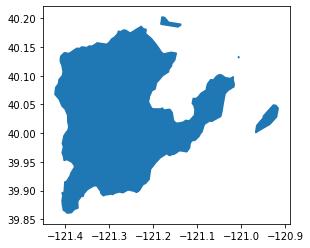

In [108]:
gdf_1d.plot()

In [109]:
gdf_1d = FireGpkg_sfs.merge_fires(gdf_1d, fid, tst, t)

In [112]:
gdf_1d

,geometry,ftype,isactive,t_inactive,isignition,invalid,n_pixels,n_newpixels,farea,fperim,...,tst_year,tst_month,tst_day,tst_ampm,ted_year,ted_month,ted_day,ted_ampm,ted_doy,mergid
mergid,,,,,,,,,,,,,,,,,,,,,
0,"MULTIPOLYGON (((-120.95942 40.00282, -120.9652...",2,1,0,0,0,7051,1295,678.499058,1.858541,...,2021,7,14,AM,2021,2021,2021,AM,204,0


> save_gdf_trng & save_gdf_1fire

In [127]:
# ted = (2021,7,22,'PM')
ted = (2021,9,15,'PM')
falim = 4

In [128]:
import FireIO

# read allfires
allfires = FireIO.load_fobj(ted)

# extract large valid fires
# large_ids = [allfires.fires[i].fireID for i in range(allfires.number_of_validfires) if allfires.fires[i].farea > falim]
large_ids = [f.fireID for f in allfires.validfires if f.farea > falim]

# remove fires merged to other fires (is this really needed? all validfires have not been merged to other fires... )
skip,merge_ids = zip(*FireIO.load_fobj(ted).heritages)
large_ids = [fire for fire in large_ids if fire not in skip]

In [129]:
fid = large_ids[0]

In [130]:
f = allfires.fires[fid]

fh = [fid]
for h in allfires.heritages:
    if h[1] == fid:
        fh.append(h[0])

In [131]:
start_end = (f.t_st,f.t_ed)

In [132]:
gdf_sf = FireGpkg_sfs.make_fire_history(fid, start_end, fh)

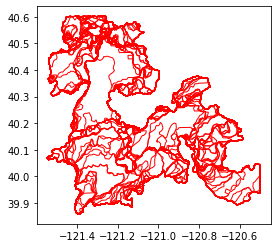

In [133]:
gdf_sf.plot(facecolor='none',edgecolor='r')

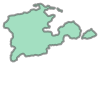

In [142]:
gdf_sf.iloc[20].geometry

> read and test output

In [144]:
f0read_perimeter = FireIO.load_gpkgsfs(ted,0,layer='perimeter')

In [153]:
f0read_fireline = FireIO.load_gpkgsfs(ted,0,layer='fireline')

In [158]:
f0read_newfirepix = FireIO.load_gpkgsfs(ted,0,layer='newfirepix')

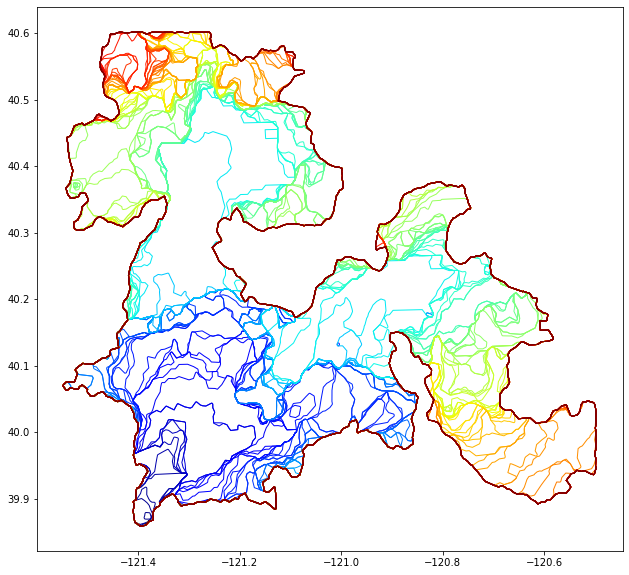

In [170]:
fig,ax=plt.subplots(ncols=1,figsize=(15,10))
f0read_perimeter.plot(ax=ax,facecolor='none',edgecolor=pltcm.jet(f0read_perimeter.duration/f0read_perimeter.duration.max()))

In [203]:
f0read_newfirepix.iloc[[28]]

,mergid,geometry
index,,
2021-07-29T00:00:00,0.0,"MULTIPOINT (-121.24713 40.20106, -121.20690 40..."


In [197]:
f0read_fireline.iloc[[30]]

,mergid,geometry
index,,
2021-07-29T00:00:00,0.0,"MULTILINESTRING ((-121.40983 40.03754, -121.41..."


In [201]:
f0read_perimeter.iloc[[28]]

,mergid,ftype,isactive,t_inactive,isignition,invalid,n_pixels,n_newpixels,farea,fperim,...,tst_year,tst_month,tst_day,tst_ampm,ted_year,ted_month,ted_day,ted_ampm,ted_doy,geometry
index,,,,,,,,,,,,,,,,,,,,,
2021-07-29T00:00:00,0,2,1,0,0,0,11336,504,1055.183478,2.712601,...,2021,7,14,AM,2021,7,29,AM,210,"MULTIPOLYGON (((-121.37765 39.86628, -121.3785..."


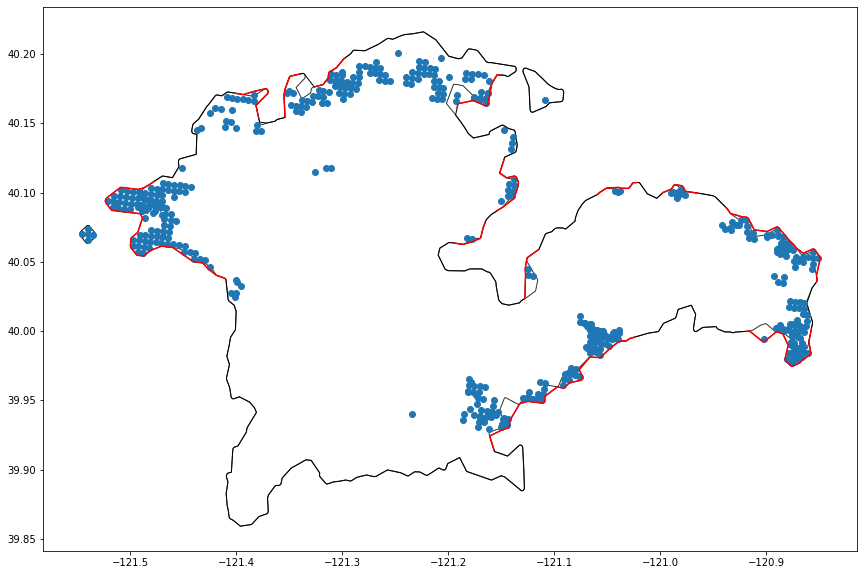

In [207]:
fig,ax=plt.subplots(ncols=1,figsize=(15,10))
f0read_perimeter.iloc[[27]].plot(ax=ax,facecolor='none',edgecolor='0.2')
f0read_perimeter.iloc[[28]].plot(ax=ax,facecolor='none',edgecolor='k')
f0read_fireline.iloc[[30]].plot(ax=ax,color='r')
f0read_newfirepix.iloc[[28]].plot(ax=ax)

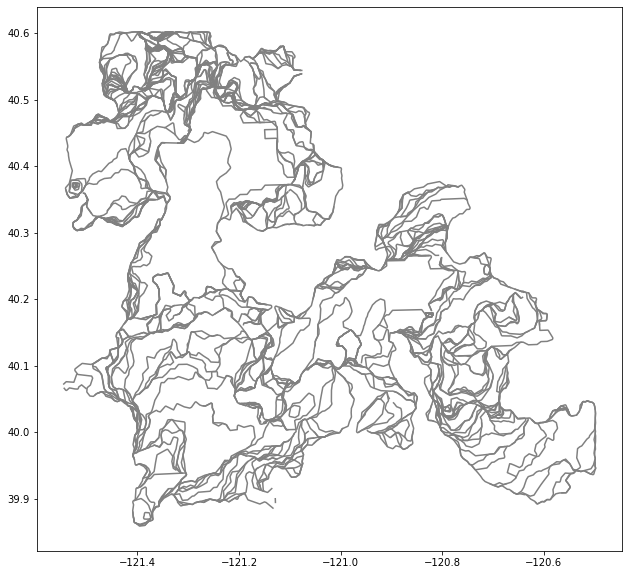

In [169]:
fig,ax=plt.subplots(ncols=1,figsize=(15,10))
# f0read_perimeter.plot(ax=ax,facecolor='none',edgecolor=pltcm.jet(f0read_perimeter.duration/f0read_perimeter.duration.max()))
f0read_fireline.plot(ax=ax,color='0.5')
# f0read_newfirepix.plot(ax=ax,color=pltcm.jet(f0read_fireline.duration/f0read_perimeter.duration.max()),markersize=1)
# _=gpd.GeoSeries(f.newlocsMP).plot(ax=ax,color='grey',alpha=0.2)
# _=gpd.GeoSeries(f.fline).plot(ax=ax,facecolor='none',edgecolor='blue')
# _=gdf_flp.plot(ax=ax,color='r',alpha=0.9)

In [1]:
import ycpy
ycpy.util.nowarn()

In [2]:
import FireObj
import FireIO
import FireConsts
import FireMain

In [3]:
t = (2021,8,1,'AM')

In [3]:
vlist = FireIO.read_AFP((2021,8,1,'AM'),src='SNPP',nrt=False,region=('Dixie',[-121.6,39.8,-120.5,40.6]))

In [16]:
vlist = FireIO.read_AFP((2021,8,1,'AM'),src='NOAA20',nrt=False,region=('Dixie',[-121.6,39.8,-120.5,40.6]))

In [5]:
vlist = FireIO.read_AFP((2020,8,1,'AM'),src='NOAA20',nrt=True,region=('Dixie',[-121.6,39.8,-120.5,40.6]))

/Users/yangchen/Jacaranda/ProjectData/FEDStest/ExtData/VJ114IMGTDL/J1_VIIRS_C2_Global_VJ114IMGTDL_NRT_2020214.txt


In [8]:
df = FireIO.read_VJ114IMGTDL((2020,8,1,'AM'))

/Users/yangchen/Jacaranda/ProjectData/FEDStest/ExtData/VJ114IMGTDL/J1_VIIRS_C2_Global_VJ114IMGTDL_NRT_2020214.txt


In [9]:
df

,latitude,longitude,confidence,frp,daynight
0,37.91087,13.16763,nominal,1.8,N
1,32.61592,22.72435,nominal,1.5,N
2,32.85765,12.22948,nominal,7.1,N
3,32.19976,20.13223,nominal,1.3,N
4,29.88663,30.02915,nominal,0.6,N
...,...,...,...,...,...
86008,-29.24186,29.61089,nominal,3.3,N
86009,-29.24111,29.59863,nominal,2.7,N
86010,-29.24147,29.60460,nominal,2.7,N
86011,-28.93981,29.11808,nominal,1.8,N


In [11]:
DNFlag = {'AM':'N', 'PM':'D'}
df = FireIO.AFP_ampmfilter(df,strcol='daynight',strval=DNFlag['AM'])

In [14]:
shp_Reg = FireIO.get_reg_shp([-121.6,39.8,-120.5,40.6])
df = FireIO.AFP_regfilter(df,shp_Reg,strlat='latitude',strlon='longitude')

In [15]:
df

,latitude,longitude,confidence,frp,daynight


In [7]:
FireIO.read_AFPNOAA20NRT((2020,8,1,'AM'),region=('Dixie',[-121.6,39.8,-120.5,40.6]) )

/Users/yangchen/Jacaranda/ProjectData/FEDStest/ExtData/VJ114IMGTDL/J1_VIIRS_C2_Global_VJ114IMGTDL_NRT_2020214.txt


,Lat,Lon,FRP,Sat


In [6]:
allfires = FireIO.load_fobj((2021,9,1,'AM'),'Dixie')

In [21]:
f = allfires.fires[0]

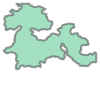

In [23]:
f.hull

In [20]:
for f in allfires.fires:
    print(f.fireID,f.farea)

0 3712.3282330056472
1 0.1818696907516098
2 0.2126964291124837
3 16.545139589425936
4 0.28807239971258825
5 1.1857815761801185
6 0.14377323284405383
7 0.14373716005276216
8 0.14371328670127337
9 1.7886284358291962
10 0.9507204101223363
11 0.1445313043467431
12 0.1444044556709526
13 0.144970669714738
14 0.8005362744867398
15 0.6449111853646882
16 1.8871647002876941
17 6.196481479865577
18 10.906223622384532
19 0.14424645804557082
20 55.71157900776968
21 0.24140541693241613
22 0.14402822534059428
23 1.2979548190673433
24 0.16867547837175953


In [2]:
    dd = {'fireID':'int',                  # id
          'mergid':'int',               # this is the id in the large fire database
          #'clat':'float',               # centroid latitude   -> centroid[0]
          #'clon':'float',               # centroid longitude  -> centroid[1]
          'ftype':'int',                # fire type
          'isactive':'int',             # active status
          't_inactive':'int',           # how long has it been inactive
          'isignition':'int',           # is this a new ignition?
          'invalid':'int',              # invalid status
          'n_pixels':'int',             # number of total pixels
          'n_newpixels':'int',          # number of new pixels
          'farea':'float',              # fire size
          'fperim':'float',             # fire perimeter length
          'flinelen':'float',           # active fire front line length
          'duration':'float',           # fire duration
          'pixden':'float',             # fire pixel density
          'meanFRP':'float',            # mean FRP of the new fire pixels
          'tst_year':'int',             # t_st[0]
          'tst_month':'int',
          'tst_day':'int',
          'tst_ampm':'str',
          'ted_year':'int',             # t_ed[0]
          'ted_month':'int',
          'ted_day':'int',
          'ted_ampm':'str',
          'ted_doy':'int',
          }

In [8]:
'fareaa' in dd.keys()

False

In [9]:
import geopandas as gpd
import pandas as pd

In [10]:
fnm = '/Users/yang/GoogleDrive/Shared/FEDS1.0/Data/Snapshot/Finalperimeter_2012-2020.gpkg'

In [11]:
gdf = gpd.read_file(fnm,layer='perimeter')

In [14]:
gdf.dtypes

year           int64
fireID         int64
clat         float64
clon         float64
ftype          int64
n_pixels       int64
farea        float64
fperim       float64
duration     float64
pixden       float64
meanFRP      float64
tst           object
ted           object
geometry    geometry
dtype: object

In [44]:
import copy

In [45]:
allfires = FireIO.load_fobj((2021,9,1,'AM'),'Dixie')

In [46]:
allfires_discard = copy.deepcopy(allfires)
allfires_discard.fires = [f for f in allfires_discard.fires if (f.isactive==False and f.mayreactivate==False)]
allfires.fires = [f for f in allfires.fires if (f.isactive or f.mayreactivate)]

In [21]:
import pickle

In [22]:
fnm = '/Users/yangchen/Downloads/fires_discard.pkl'
with open(fnm,'wb') as f:
    pickle.dump(allfires_discard, f)

In [48]:
with open(fnm,'rb') as f:
    allfires_discard_read = pickle.load(f)

In [28]:
allfires_discard_read.number_of_fires,allfires_discard_read.number_of_activefires,allfires_discard_read.number_of_validfires

(23, 0, 2)

In [29]:
allfires_discard.number_of_fires,allfires_discard.number_of_activefires,allfires_discard.number_of_validfires

(23, 0, 2)

In [30]:
allfires.number_of_fires,allfires.number_of_activefires,allfires.number_of_validfires

(2, 2, 2)

In [31]:
allfires_reread = FireIO.load_fobj((2021,9,1,'AM'),'Dixie')

In [32]:
allfires_reread.number_of_fires,allfires_reread.number_of_activefires,allfires_reread.number_of_validfires

(25, 2, 4)

In [52]:
allfires.fires = allfires.fires + allfires_discard_read.fires

In [53]:
allfires.number_of_fires,allfires.number_of_activefires,allfires.number_of_validfires

(25, 2, 4)

In [67]:
for k in allfires_reread.__dict__.keys():
    print(k,getattr(allfires_reread,k) == getattr(allfires,k) )

t True
fires False
fids_expanded True
fids_new True
fids_merged True
fids_invalid True
heritages True


In [70]:
fnm = '/Users/yangchen/Jacaranda/ProjectData/FEDStest/Output/Dixie/2021/Serialization/Inactive_fobj.pkl'

In [71]:
with open(fnm,'rb') as f:
    allfires_ia = pickle.load(f)

In [74]:
allfires_ia.number_of_fires,allfires_ia.number_of_activefires

(1841, 0)

In [75]:
fnm = '/Users/yangchen/Jacaranda/ProjectData/FEDStest/Output/Dixie/2021/Serialization/20210915PM.pkl'

In [76]:
with open(fnm,'rb') as f:
    allfires_a = pickle.load(f)

In [77]:
allfires_a.number_of_fires,allfires_a.number_of_activefires

(2, 1)

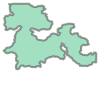

In [80]:
allfires_a.fires[0].hull